In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

In [2]:
def load_data(directory, maxData=None, randomState=1):
    '''
    Loads the different data sets from file. Smaller (random) subsets can be taken for experimenting by using the MaxData and 
    random state parameters
    '''
    #Get list of all images in directory
    imagePaths = glob.glob(directory+'/*/*.jpg', recursive=True)
    
    if maxData is not None:
        np.random.set_state=randomState
        imagePaths = np.random.choice(imagePaths,size=maxData)
          
    X =[]
    y =[]
    for path in imagePaths:
        label = path.split("\\")[-2]
        image = cv2.imread(path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        X.append(image)
        y.append(label)
        
    return np.array(X), np.array(y)

In [10]:
# Load data sources

X,y = load_data('./data/fruits/fruits-360/Training',maxData=20000)
X_flickr, y_flickr = load_data('./data/flickr')

X_flickr, y_flickr = shuffle(X_flickr, y_flickr)

fruitsubset = ['Strawberry', 'Apple', 'Lemon', 'Orange', 'Mango', 'Banana', 'Grape', 'Passion Fruit', 'Peach']
infruitsubset = np.in1d(y_flickr, fruitsubset)
X_flickr_subset = X_flickr[infruitsubset]
y_flickr_subset = y_flickr[infruitsubset]

## Visualising the data

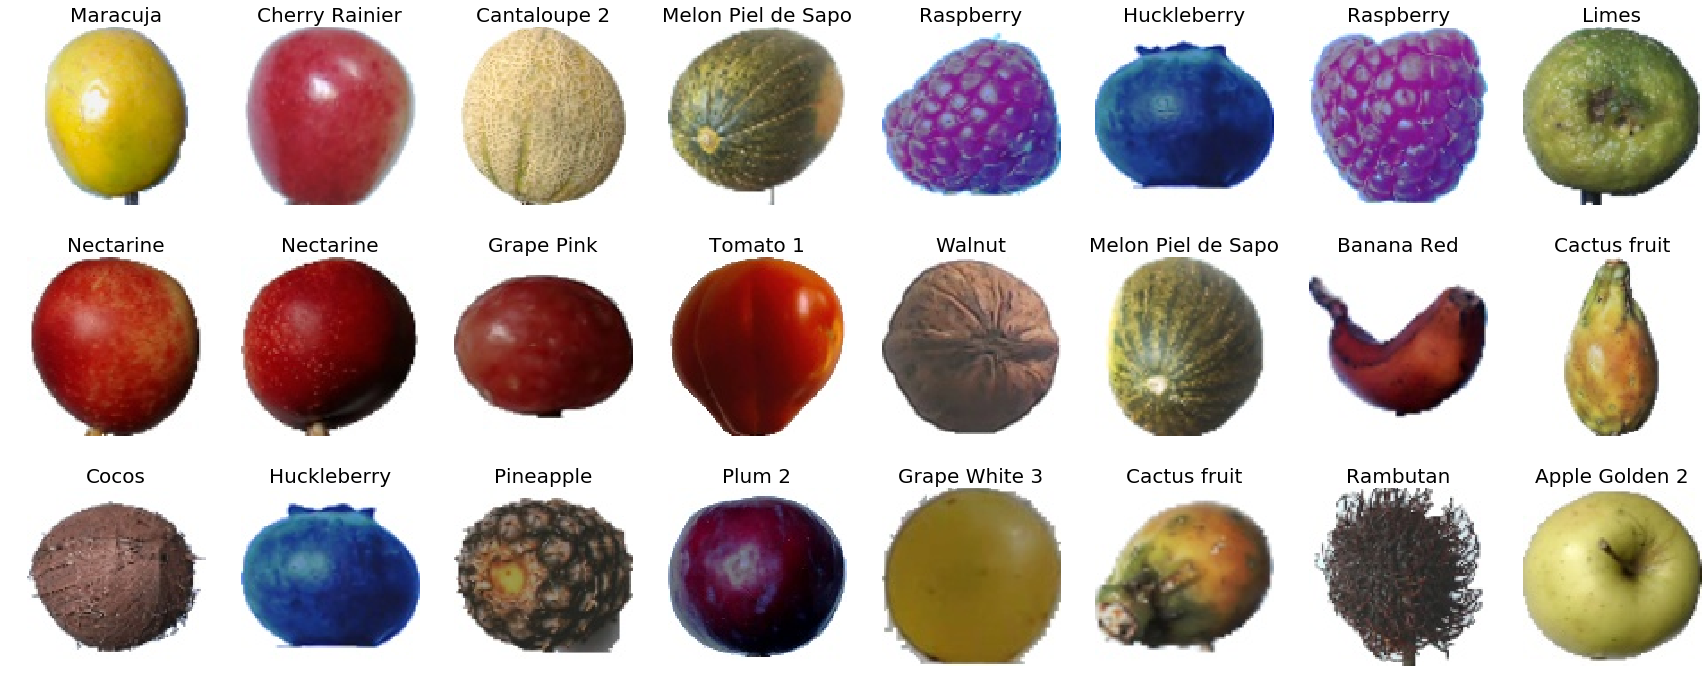

In [6]:
plt.figure(figsize=(30,12))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(X[i,:,:,:])
    plt.title(y[i], size = 20)
    plt.axis('off')

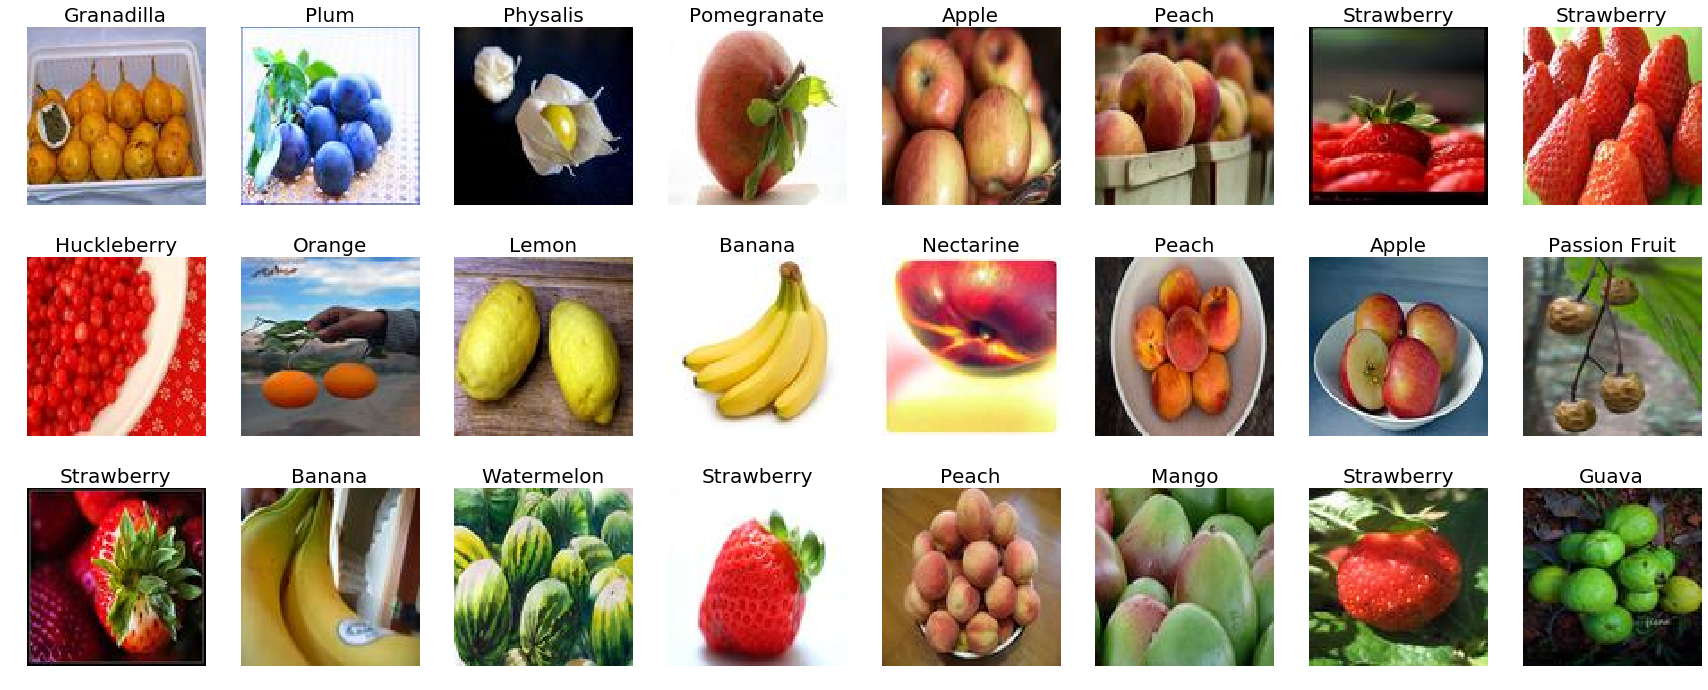

In [11]:
plt.figure(figsize=(30,12))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(X_flickr[i,:,:,:])
    plt.title(y_flickr[i], size = 20)
    plt.axis('off')

# PCA and TSNE

In [52]:
X_flat = X.reshape(len(X),-1)
pca = PCA(n_components=50)
pca_fruit360 = pca.fit_transform(X_flat)

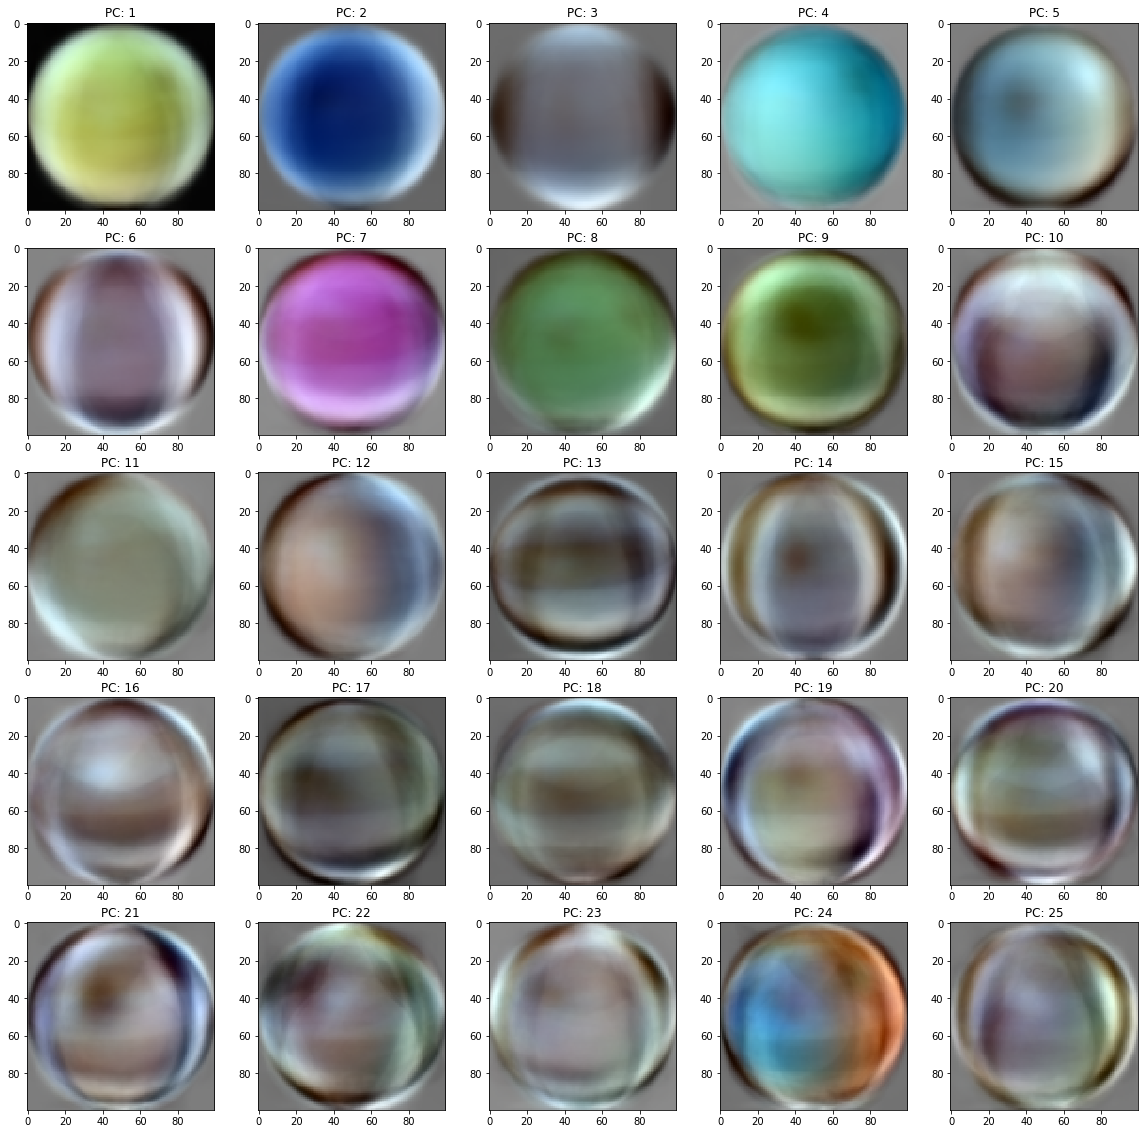

In [53]:
plt.figure(figsize=(20,20))

for count, component in enumerate(pca.components_[:25]):
    plt.subplot(5,5,count+1)
    mincomp = np.min(component)
    maxcomp = np.max(component)
    
    image = (255*(component-mincomp)/(maxcomp-mincomp)).astype(int)
    image = image.reshape((100,100,3))
    
    plt.imshow(image)
    plt.title('PC: '+str(count+1))

In [16]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_fruit360)

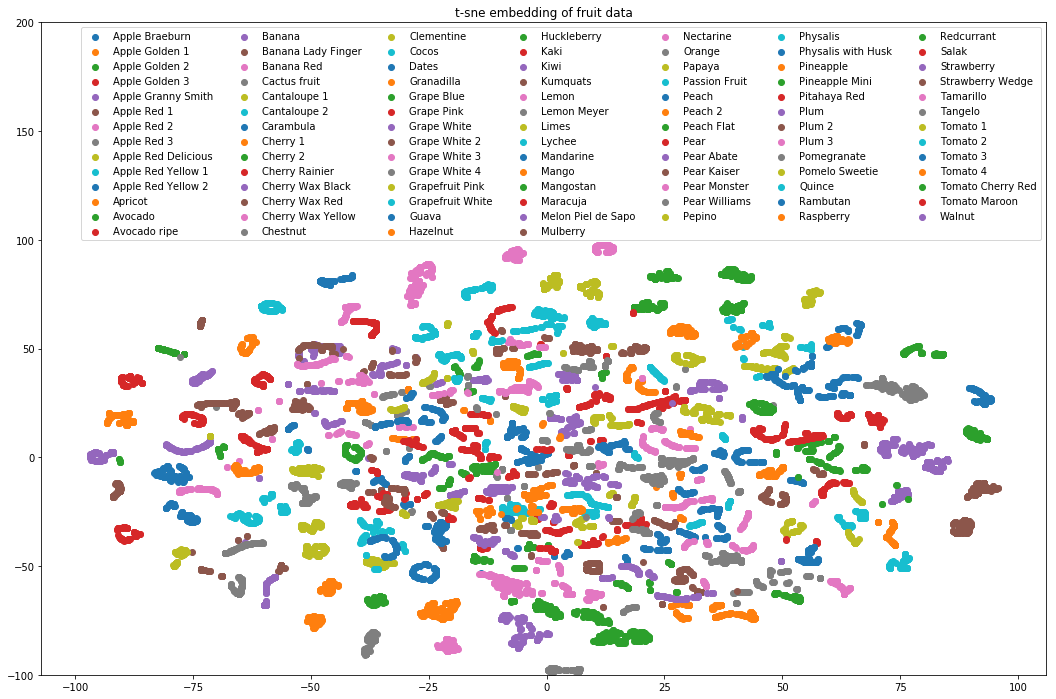

In [36]:
plt.figure(figsize=(18,12))

for i, fruit in enumerate(np.unique(y)):
    fruit_results = tsne_result[y==fruit]
    plt.scatter(fruit_results[:,0], fruit_results[:,1], label=fruit)

plt.legend(ncol=7);
plt.ylim((-100,200))
plt.title('t-sne embedding of fruit data')
plt.savefig('TSNE_fruit360.png')

In [39]:
X_flickr_flat = X_flickr.reshape(len(X_flickr), -1)

pca = PCA(n_components=50)
pca_flickr = pca.fit_transform(X_flickr_flat)

tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result_flickr = tsne.fit_transform(pca_flickr)

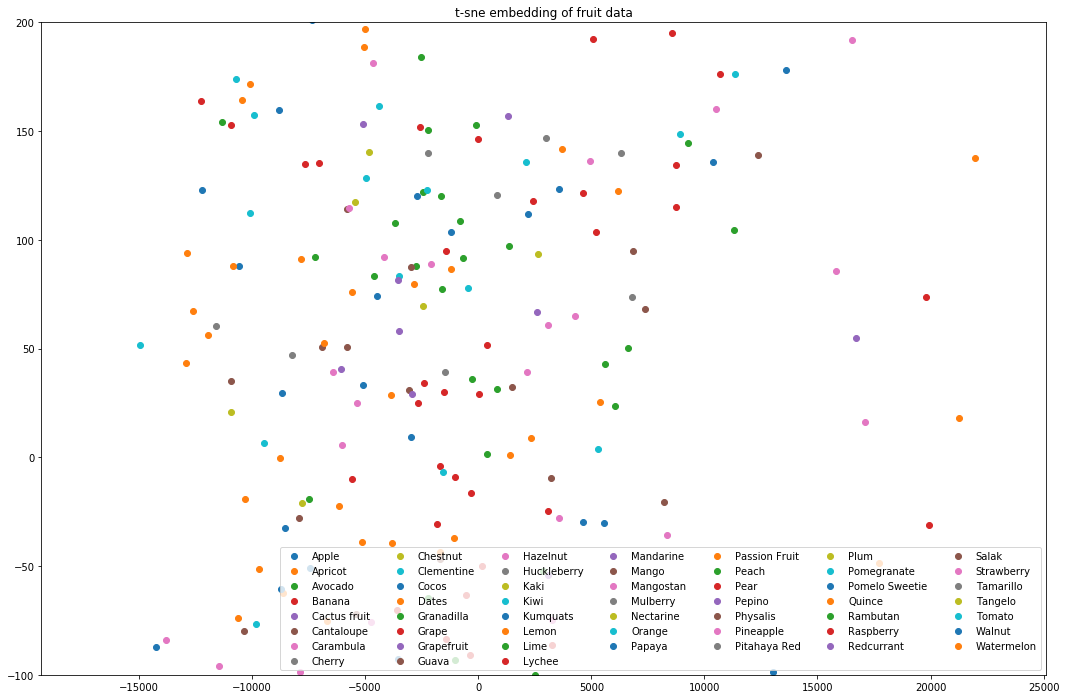

In [41]:
plt.figure(figsize=(18,12))

for i, fruit in enumerate(np.unique(y_flickr)):
    fruit_results = pca_flickr[y_flickr==fruit]
    plt.scatter(fruit_results[:,0], fruit_results[:,1], label=fruit)

plt.legend(ncol=7);
plt.ylim((-100,200))
plt.title('t-sne embedding of fruit data')
plt.savefig('TSNE_flickr.png')

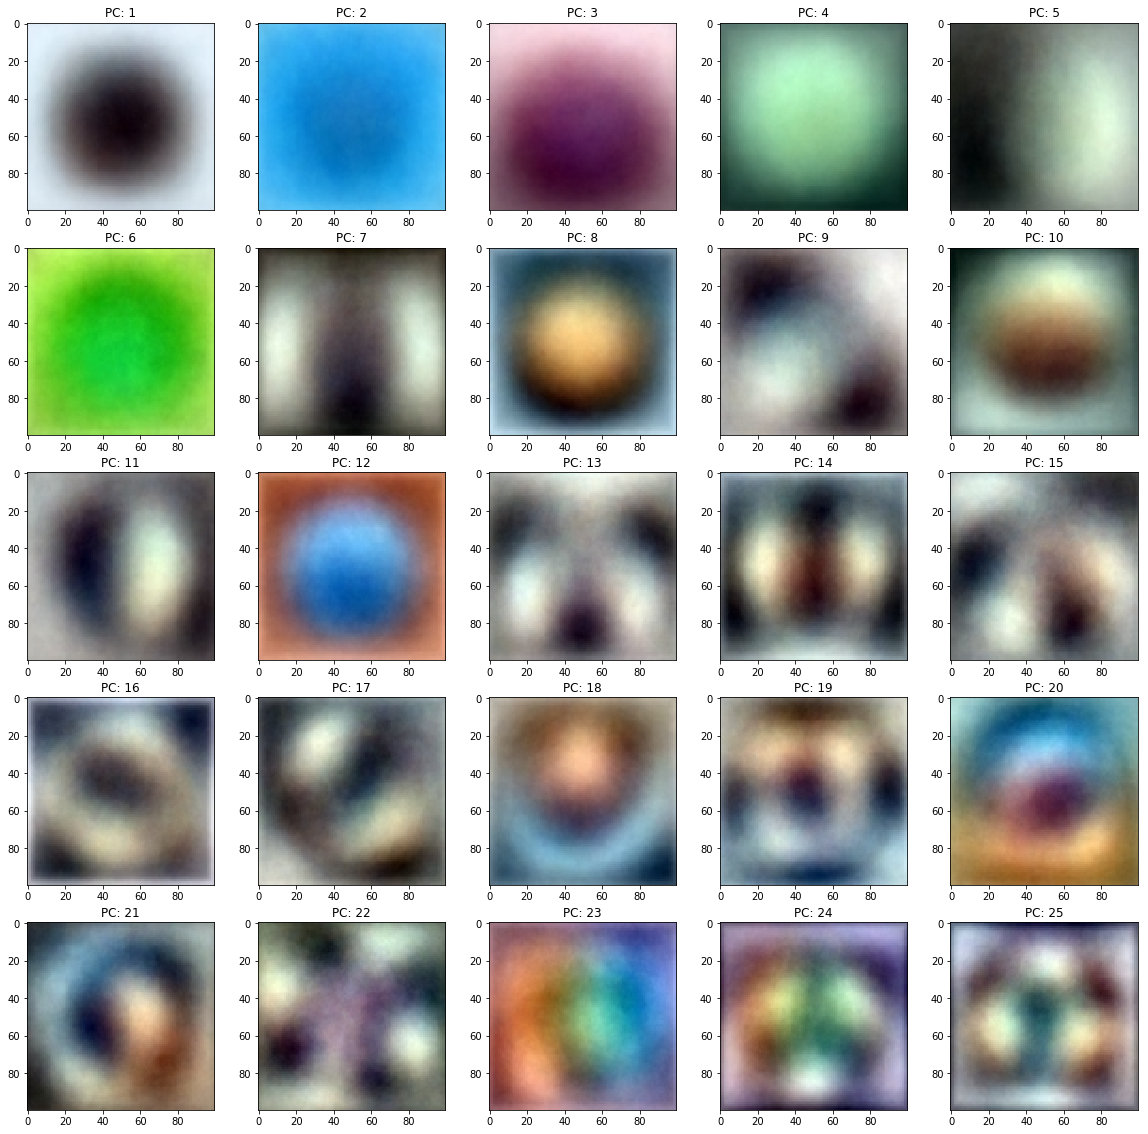

In [51]:
plt.figure(figsize=(20,20))

for count, component in enumerate(pca.components_[:25]):
    plt.subplot(5,5,count+1)
    mincomp = np.min(component)
    maxcomp = np.max(component)
    
    image = (255*(component-mincomp)/(maxcomp-mincomp)).astype(int)
    image = image.reshape((100,100,3))
    
    plt.imshow(image)
    plt.title('PC: '+str(count+1))